In [1]:
import pandas as pd

In [2]:
bikes_df = pd.read_csv('day.csv')

In [3]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

In [4]:
bikes = bikes_df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [5]:
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [6]:
bikes['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [7]:
bikes[['season']] = bikes[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bikes[['mnth']] = bikes[['mnth']].apply(lambda x: x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}))
bikes[['weekday']] = bikes[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}))
bikes[['weathersit']] = bikes[['weathersit']].apply(lambda x: x.map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'snow+fog'}))

In [8]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables

In [9]:
dummy_lst = ['season', 'mnth', 'weekday', 'weathersit']

In [10]:
dummies = pd.get_dummies(bikes[dummy_lst], drop_first=True)

In [11]:
dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_snow
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
bikes = pd.concat([bikes, dummies], axis=1)

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_snow
0,spring,0,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [13]:
bikes.drop(columns=['season', 'mnth', 'weekday', 'weathersit'], inplace=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint8  
 9   season_summer    730 non-null    uint8  
 10  season_winter    730 non-null    uint8  
 11  mnth_Aug         730 non-null    uint8  
 12  mnth_Dec         730 non-null    uint8  
 13  mnth_Feb         730 non-null    uint8  
 14  mnth_Jan         730 non-null    uint8  
 15  mnth_Jul         730 non-null    uint8  
 16  mnth_Jun         730 non-null    uint8  
 17  mnth_Mar        

## EDA

#### For numeric variables

In [15]:
import piplite
await piplite.install(['seaborn'])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

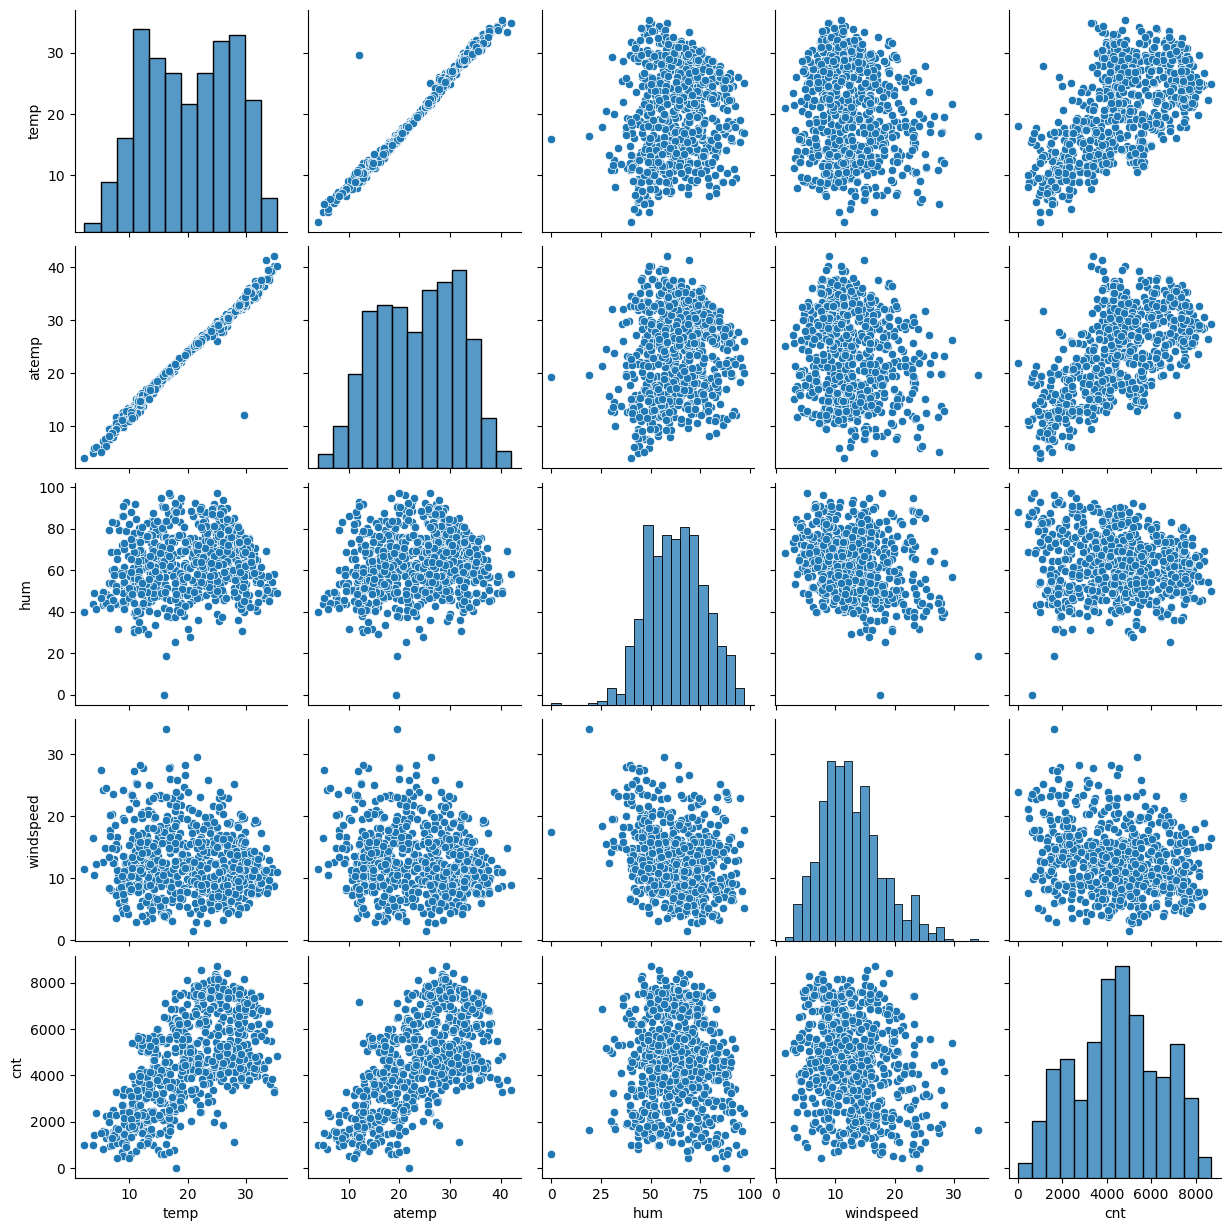

In [17]:
sns.pairplot(data=bikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

### Visualizing categorical variables

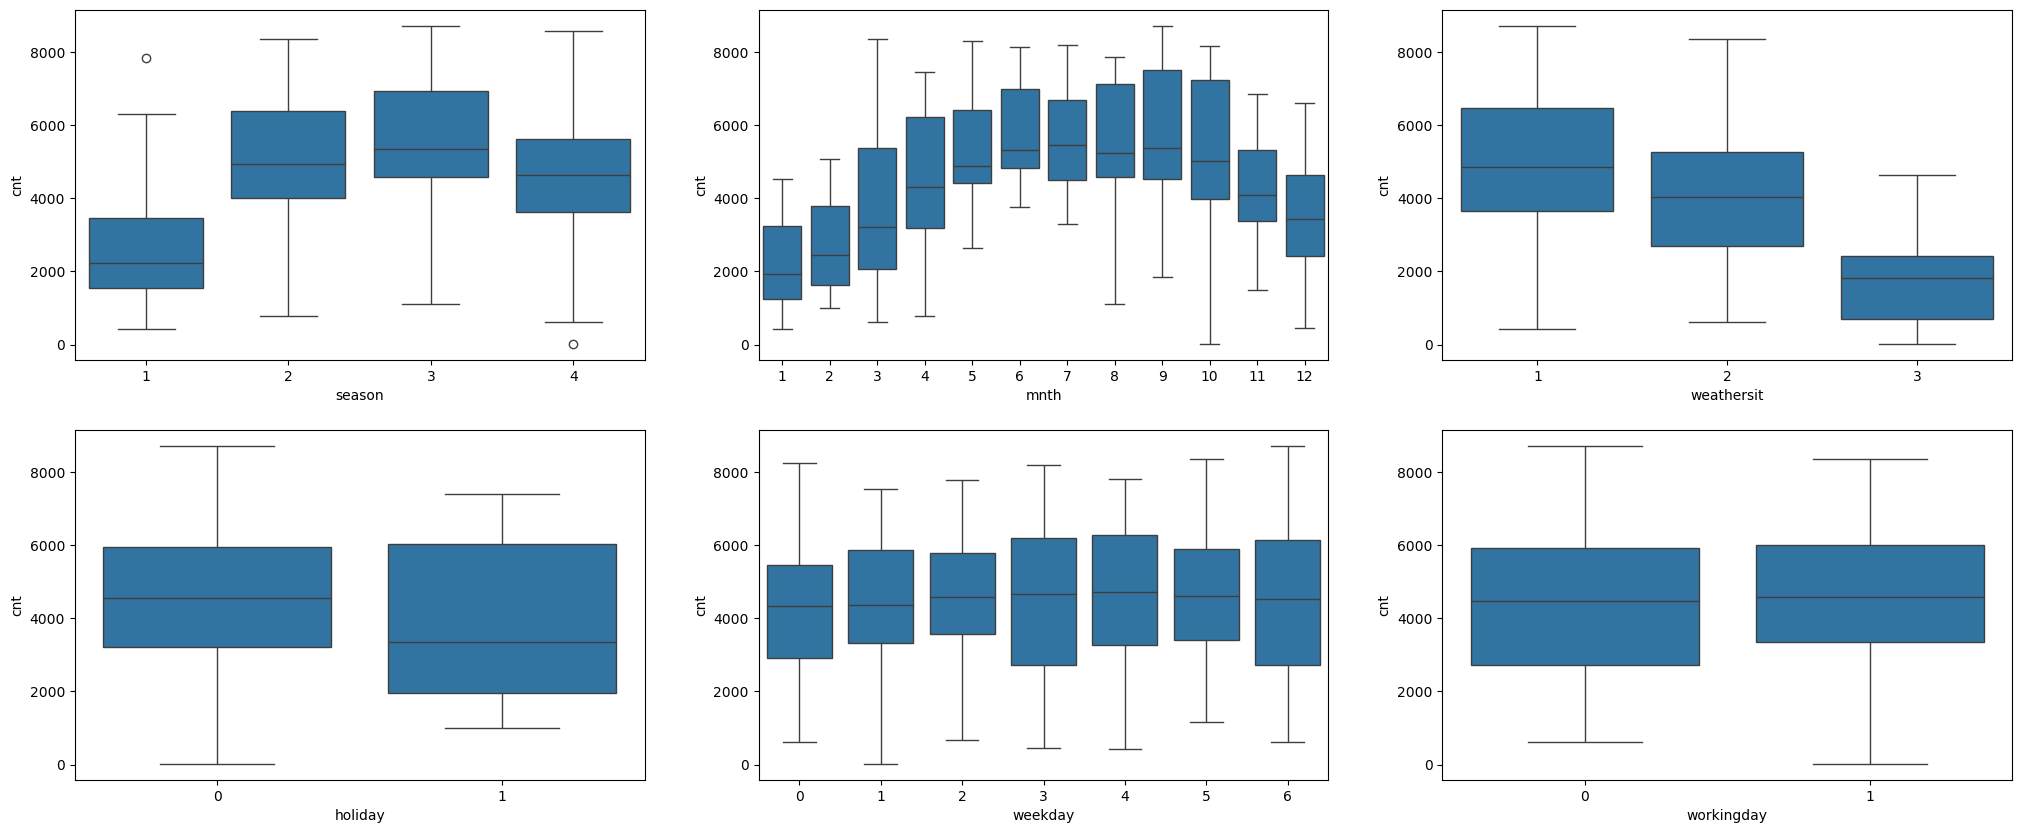

In [18]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.show()

### Correlation

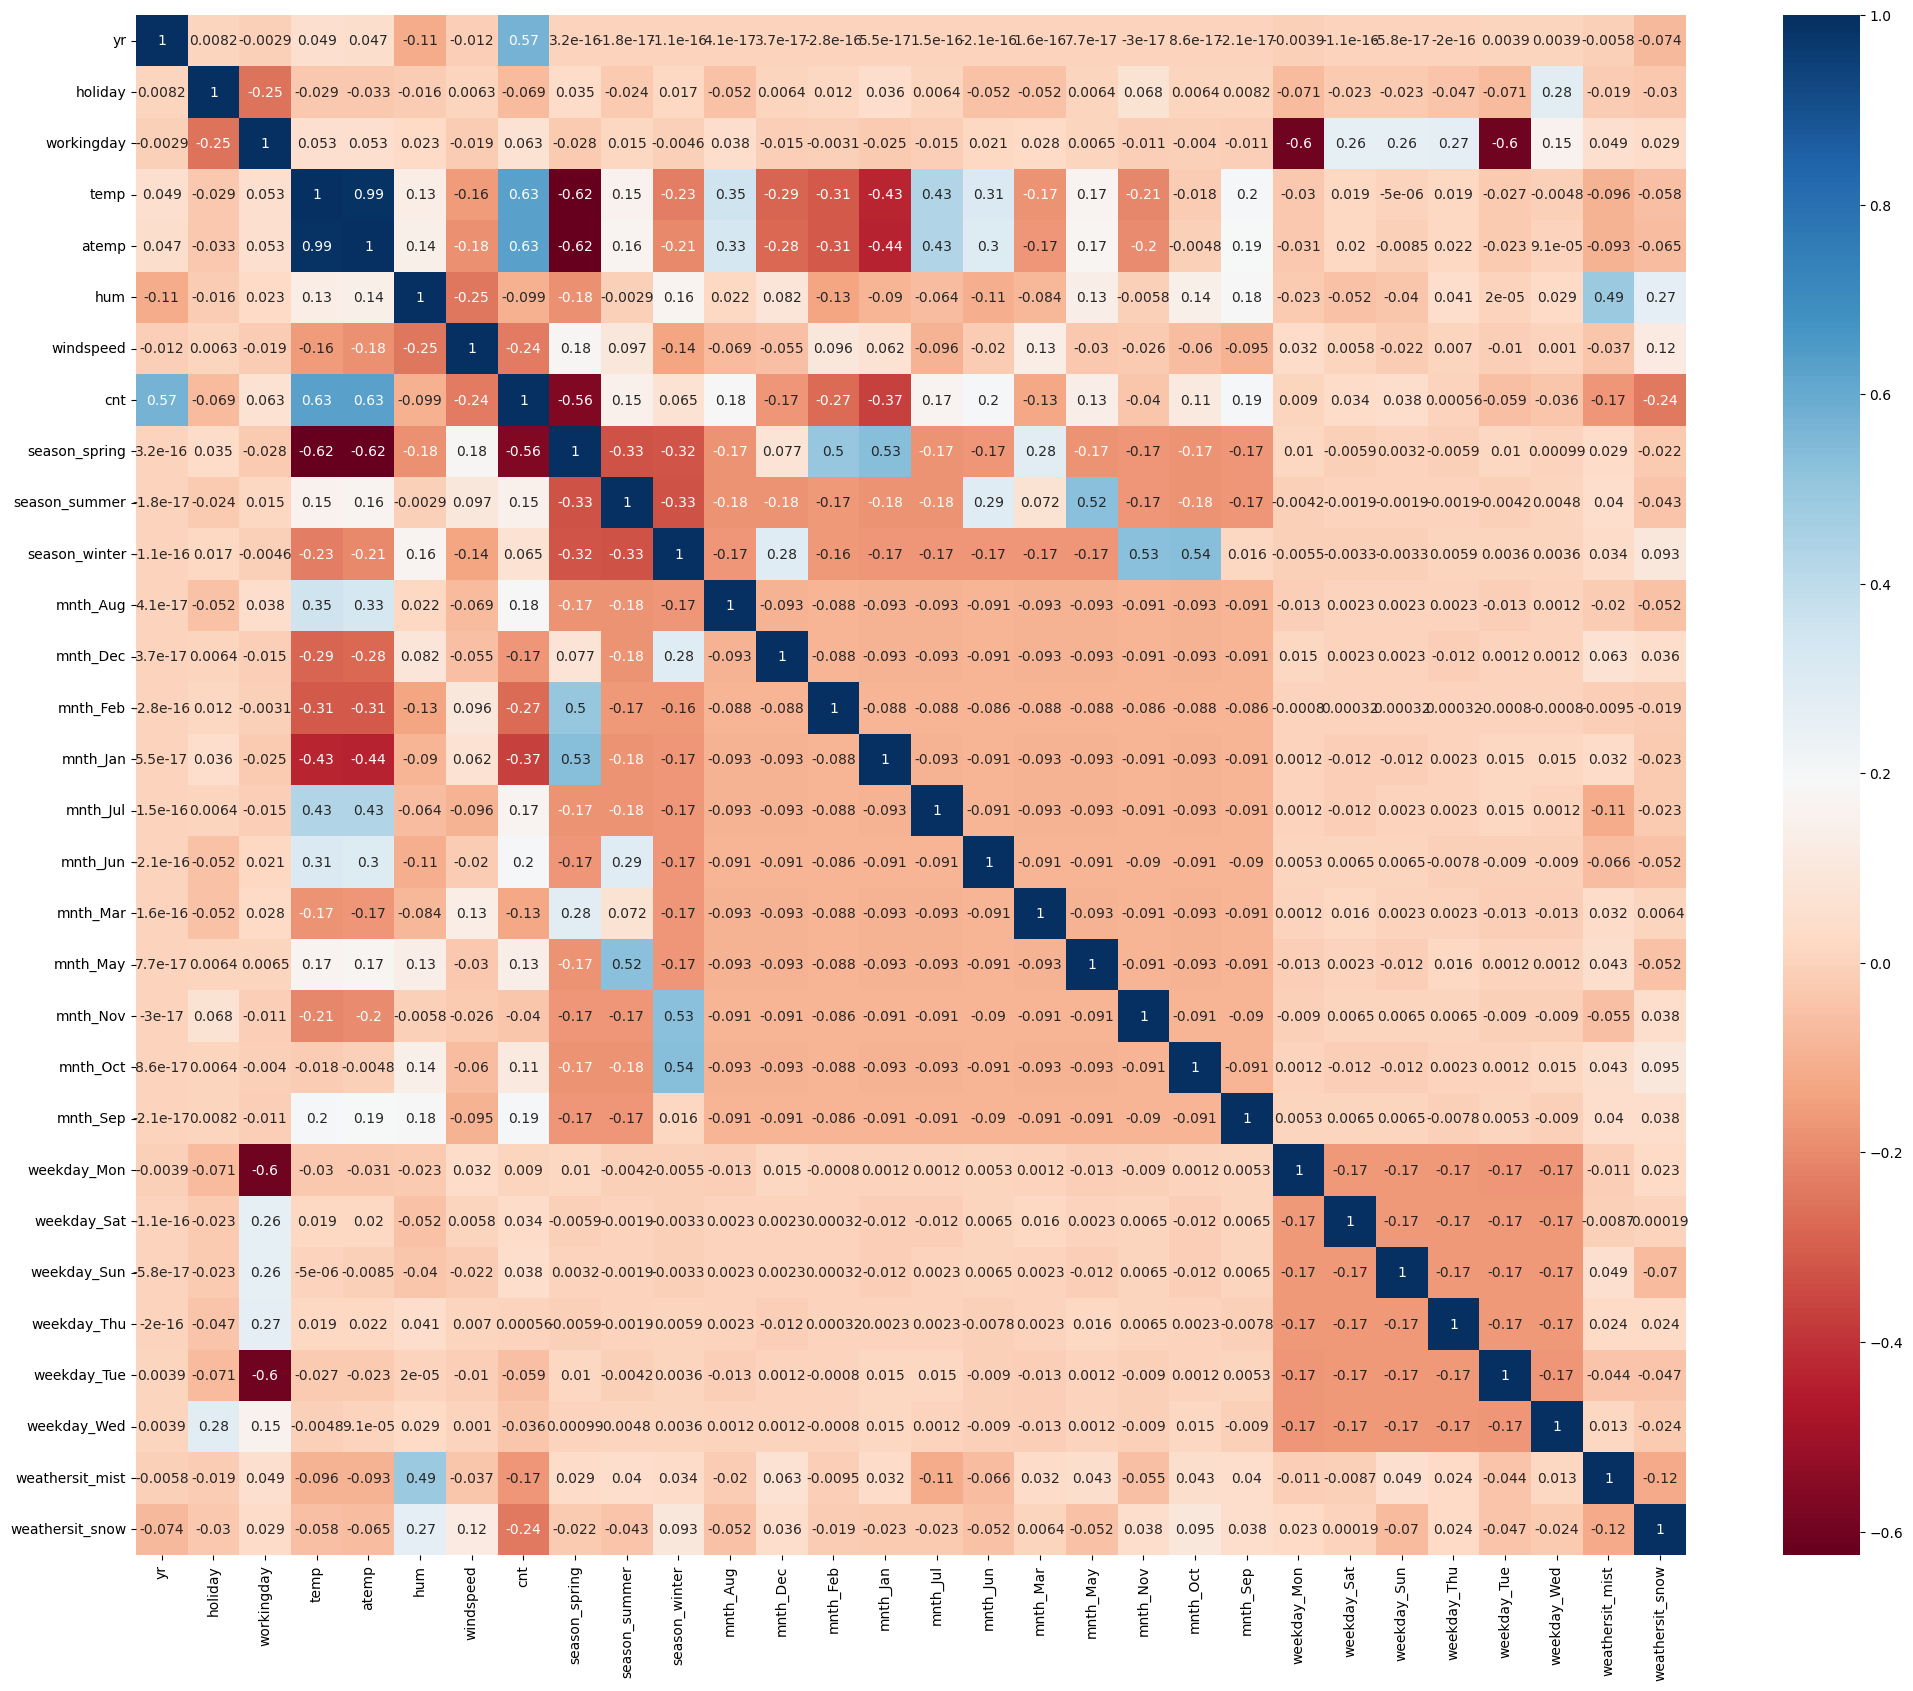

In [19]:
plt.figure(figsize = (25,20))

sns.heatmap(bikes.corr(), annot=True, cmap="RdBu")
plt.show()

## Spliting Data

In [20]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling features

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [22]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0


### Dividing into X and Y sets

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building linear model

### RFE

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 10),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [28]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weekday_Tue', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed'],
      dtype='object')

In [30]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

### Check VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,workingday,40.71
10,weekday_Mon,9.93
11,weekday_Tue,9.64
3,temp,2.99
6,season_spring,2.55
1,holiday,2.54
4,hum,1.89
7,season_winter,1.78
12,weathersit_mist,1.57
8,mnth_Jul,1.30


In [33]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [34]:
lr.params

const             -3.810676e+11
yr                 2.310304e-01
holiday            3.810676e+11
workingday         3.810676e+11
temp               4.792449e-01
hum               -1.474290e-01
windspeed         -1.678343e-01
season_spring     -1.061773e-01
season_winter      5.818531e-02
mnth_Jul          -7.796453e-02
mnth_Sep           5.948334e-02
weekday_Mon        3.810676e+11
weekday_Tue        3.810676e+11
weathersit_mist   -5.930850e-02
weathersit_snow   -2.513575e-01
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.59e-189
Time:                        10:19:53   Log-Likelihood:                 509.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     496   BIC:                            -932.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.811e+11    6.3e+11     -0.605      0.546   -1.62e+12    8.57e+11
yr                  0.2310      0.008     28.378      0.000       0.215       0.247
holiday          3.811e+11    6.3e+11      0.605      0.546   -8.57e+11    1.62e+12
workingday       3.811e+11    6.3e+11      0.605      0.546   -8.57e+11    1.62e+12
temp                0.4792      0.031     15.635      0.000       0.419       0.539
hum                -0.1474      0.038     -3.905      0.000      -0.222      -0.073
windspeed          -0.1678      0.026     -6.562      0.000      -0.218      -0.118
season_spring      -0.1062      0.015     -7.125      0.000      -0.135      -0.077
season_winter       0.0582      0.012      4.718      0.000       0.034       0.082
mnth_Jul           -0.0780      0.017     -4.552      0.000      -0.112      -0.044
mnth_Sep            0.0595      0.015      3.843      0.000       0.029       0.090
weekday_Mon      3.811e+11    6.3e+11      0.605      0.546   -8.57e+11    1.62e+12
weekday_Tue      3.811e+11    6.3e+11      0.605      0.546   -8.57e+11    1.62e+12
weathersit_mist    -0.0593      0.011     -5.622      0.000      -0.080      -0.039
weathersit_snow    -0.2514      0.026     -9.517      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       61.983   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.540
Skew:                          -0.619   Prob(JB):                     6.18e-35
Kurtosis:                       5.425   Cond. No.                     6.00e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Dropping the variable and updating the model

* Removing the variable 'workingday' based on its High p-value & High VIF

In [36]:
X = X_train_rfe.drop(['workingday'], axis=1)

In [37]:
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [38]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.81e-190
Time:                        10:22:44   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3364      0.031     10.879      0.000       0.276       0.397
yr                  0.2307      0.008     28.473      0.000       0.215       0.247
holiday            -0.1033      0.026     -4.026      0.000      -0.154      -0.053
temp                0.4788      0.031     15.671      0.000       0.419       0.539
hum                -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed          -0.1686      0.025     -6.622      0.000      -0.219      -0.119
season_spring      -0.1067      0.015     -7.194      0.000      -0.136      -0.078
season_winter       0.0579      0.012      4.712      0.000       0.034       0.082
mnth_Jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
mnth_Sep            0.0595      0.015      3.853      0.000       0.029       0.090
weekday_Mon         0.0098      0.011      0.870      0.385      -0.012       0.032
weekday_Tue        -0.0428      0.012     -3.668      0.000      -0.066      -0.020
weathersit_mist    -0.0594      0.011     -5.648      0.000      -0.080      -0.039
weathersit_snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Calculate the VIFs again

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,22.65
2,temp,15.30
4,windspeed,4.06
5,season_spring,2.55
11,weathersit_mist,2.25
6,season_winter,2.10
0,yr,2.06
7,mnth_Jul,1.40
9,weekday_Mon,1.23
10,weekday_Tue,1.23


In [40]:
# Dropping variable - `hum` due to high VIF
X = X.drop('hum', axis=1)

In [41]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [42]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.38e-188
Time:                        10:24:13   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2575      0.024     10.857      0.000       0.211       0.304
yr                  0.2342      0.008     28.677      0.000       0.218       0.250
holiday            -0.1039      0.026     -3.994      0.000      -0.155      -0.053
temp                0.4509      0.030     14.968      0.000       0.392       0.510
windspeed          -0.1407      0.025     -5.677      0.000      -0.189      -0.092
season_spring      -0.1103      0.015     -7.348      0.000      -0.140      -0.081
season_winter       0.0491      0.012      4.007      0.000       0.025       0.073
mnth_Jul           -0.0708      0.017     -4.113      0.000      -0.105      -0.037
mnth_Sep            0.0563      0.016      3.602      0.000       0.026       0.087
weekday_Mon         0.0115      0.011      1.003      0.316      -0.011       0.034
weekday_Tue        -0.0457      0.012     -3.866      0.000      -0.069      -0.022
weathersit_mist    -0.0831      0.009     -9.535      0.000      -0.100      -0.066
weathersit_snow    -0.2917      0.025    -11.880      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       64.780   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.063
Skew:                          -0.646   Prob(JB):                     1.44e-36
Kurtosis:                       5.470   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,4.73
3,windspeed,4.04
0,yr,2.06
4,season_spring,1.68
10,weathersit_mist,1.52
5,season_winter,1.43
6,mnth_Jul,1.35
8,weekday_Mon,1.23
9,weekday_Tue,1.21
7,mnth_Sep,1.20


In [45]:
# removing 'weekday_Mon' due to high p-value

X = X.drop('weekday_Mon', axis=1)

In [46]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.60e-189
Time:                        10:26:40   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2597      0.024     10.993      0.000       0.213       0.306
yr                  0.2340      0.008     28.660      0.000       0.218       0.250
holiday            -0.1062      0.026     -4.097      0.000      -0.157      -0.055
temp                0.4502      0.030     14.948      0.000       0.391       0.509
windspeed          -0.1396      0.025     -5.636      0.000      -0.188      -0.091
season_spring      -0.1102      0.015     -7.342      0.000      -0.140      -0.081
season_winter       0.0494      0.012      4.032      0.000       0.025       0.073
mnth_Jul           -0.0704      0.017     -4.088      0.000      -0.104      -0.037
mnth_Sep            0.0564      0.016      3.611      0.000       0.026       0.087
weekday_Tue        -0.0479      0.012     -4.119      0.000      -0.071      -0.025
weathersit_mist    -0.0831      0.009     -9.537      0.000      -0.100      -0.066
weathersit_snow    -0.2916      0.025    -11.878      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       60.829   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.859
Skew:                          -0.595   Prob(JB):                     1.17e-35
Kurtosis:                       5.481   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
4,season_spring,1.66
9,weathersit_mist,1.52
5,season_winter,1.41
6,mnth_Jul,1.35
7,mnth_Sep,1.20
8,weekday_Tue,1.18
10,weathersit_snow,1.08


## Error terms

In [50]:
# residual analysis

y_train_pred = lr_3.predict(X_train_lm)

<ipython-input-51-5266b538286c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((residual), bins = 20)


Text(0.5, 0, 'Errors')

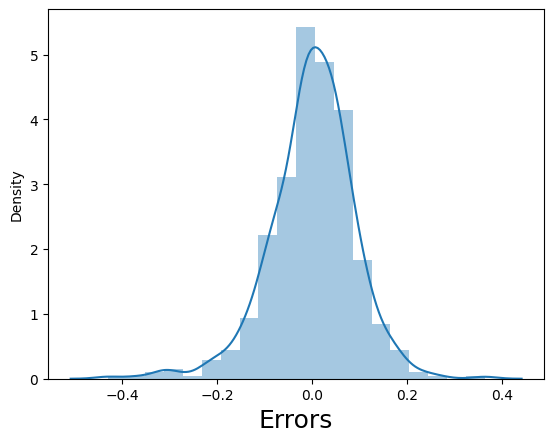

In [51]:
residual = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)

plt.xlabel('Errors', fontsize = 18)   

### Making predictions

In [52]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_mist,weathersit_snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


### Dividing into X_test and y_test

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   atemp            219 non-null    float64
 5   hum              219 non-null    float64
 6   windspeed        219 non-null    float64
 7   season_spring    219 non-null    uint8  
 8   season_summer    219 non-null    uint8  
 9   season_winter    219 non-null    uint8  
 10  mnth_Aug         219 non-null    uint8  
 11  mnth_Dec         219 non-null    uint8  
 12  mnth_Feb         219 non-null    uint8  
 13  mnth_Jan         219 non-null    uint8  
 14  mnth_Jul         219 non-null    uint8  
 15  mnth_Jun         219 non-null    uint8  
 16  mnth_Mar         219 non-null    uint8  
 17  mnth_May       

In [55]:
X_test = X_test[X.columns]

# Adding constant variable to test dataframe

X_test_lm = sm.add_constant(X_test)
X_test_lm.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   holiday          219 non-null    int64  
 3   temp             219 non-null    float64
 4   windspeed        219 non-null    float64
 5   season_spring    219 non-null    uint8  
 6   season_winter    219 non-null    uint8  
 7   mnth_Jul         219 non-null    uint8  
 8   mnth_Sep         219 non-null    uint8  
 9   weekday_Tue      219 non-null    uint8  
 10  weathersit_mist  219 non-null    uint8  
 11  weathersit_snow  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [56]:
# Making predictions using the final model (lr_3)

y_pred = lr_3.predict(X_test_lm)

## Model Evaluation

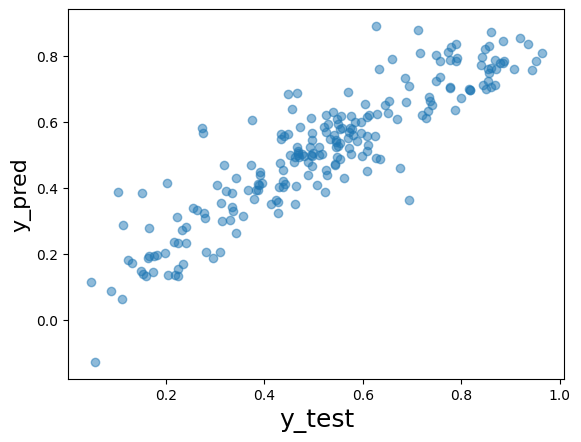

In [57]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)    
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 score

In [62]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8096777950282761

In [61]:
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7995640546674598